<a href="https://colab.research.google.com/github/souhiab/Hakathone-Challenge-JSNN/blob/main/hacathon_challenge_JSNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install  qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##data importation 
#pacages importes 

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler



# my aclual cancer data 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())



# example dataset
#features, labels = make_blobs(n_samples=20, n_features=2, centers=2, random_state=3, shuffle=True)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


(569, 2)
(569, 2)


Text(0.5, 0, 'second principle componenet')

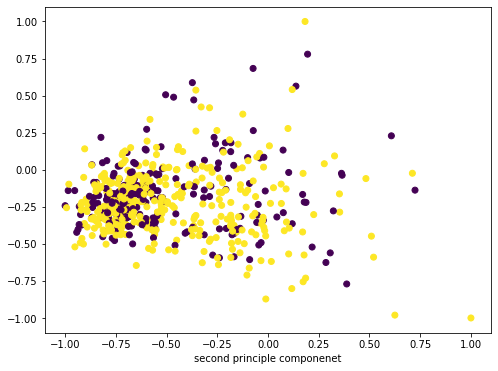

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features)


# To find if the classifier is accurate, a common strategy is
# to divide the dataset into a training set and a test set.
# Here the data is divided into 70% training, 25% testing.
train_features, test_features, train_labels, test_labels  = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=109)

#the mutch with this code X_train, X_test, Y_train, Y_test



# Now the dataset's features will be standardized
# to fit a normal distribution.
scaler = StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

#print(train_features.shape)

# To be able to use this data with the given
# number of qubits, the data must be broken down from
# 30 dimensions to `n` dimensions.
# This is done with Principal Component Analysis (PCA),
# which finds patterns while keeping variation.

n = 2 # number of principal components kept #the futur application we wanaa aplay for more qubites and trazin the algorithem to get more performance 

pca = PCA(n_components = n).fit(train_features)

#PCA(n_components=n).fit(train_features)

train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

#print(train_features.shape)

#print(train_features)



# The last step in the data processing is
# to scale the data to be between -1 and 1


#ploting my figures to see 

pii= np.pi
samples = np.append(train_features, test_features, axis=0)
print(samples.shape)



minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
#minmax_scale = MinMaxScaler(-1, 1).fit(samples)
# will be changed to 0, np.pi   ((((-1, 1    #change for 2 (delite )  #(0, 2*np.pi)
train_features = minmax_scale.transform(train_features)
test_features = minmax_scale.transform(test_features)



# Now some sample should be picked to train the model from
#training_input = {key: (X_train[Y_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
#test_input = {key: (X_train[Y_train == k, :])[training_size:(training_size+test_size)] for k, key in enumerate(class_labels)}

#ty_label = train_features
#print(ty_label.shape)
#ty_label.extend(test_features)

ty_label = np.concatenate((train_features, test_features))
print(ty_label.shape)

plt.figure(figsize=(8,6))
plt.scatter(ty_label[:,0],ty_label[:,1],c=cancer['target']) 
plt.xlabel('first principle componenet ')
plt.xlabel('second principle componenet')
 


#train_features, test_features, train_labels, test_labels = train_test_split(
 #   features, labels, train_size=15, shuffle=False)

In [ ]:
pip install qiskit[machine-learning]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 4.4 MB/s 


In [ ]:
# number of qubits is equal to the number of features
num_qubits = 2   #30 # 2

# number of steps performed during the training procedure
tau = 120  #100 

# regularization parameter
C = 1100 #1000 

In [ ]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals

from qiskit_machine_learning.kernels import QuantumKernel

algorithm_globals.random_seed = 12345

pegasos_backend = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = QuantumKernel(feature_map=feature_map, quantum_instance=pegasos_backend)

In [ ]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(train_features, train_labels)

# testing
pegasos_score = pegasos_qsvc.score(test_features, test_labels)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 0.9300699300699301


In [ ]:
grid_step = 0.2
margin = 0.2
grid_x, grid_y = np.meshgrid( np.arange(-margin, np.pi + margin, grid_step), np.arange(-margin, np.pi + margin, grid_step) )

In [ ]:
meshgrid_features = np.column_stack((grid_x.ravel(), grid_y.ravel()))
meshgrid_colors = pegasos_qsvc.predict(meshgrid_features)

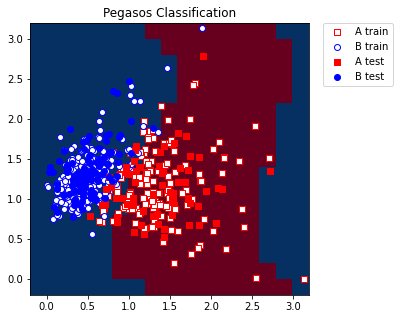

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
meshgrid_colors = meshgrid_colors.reshape(grid_x.shape)
plt.pcolormesh(grid_x, grid_y, meshgrid_colors, cmap="RdBu", shading="auto")

plt.scatter(
    train_features[:, 0][train_labels == 0],
    train_features[:, 1][train_labels == 0],
    marker="s",
    facecolors="w",
    edgecolors="r",
    label="A train",
)
plt.scatter(
    train_features[:, 0][train_labels == 1],
    train_features[:, 1][train_labels == 1],
    marker="o",
    facecolors="w",
    edgecolors="b",
    label="B train",
)

plt.scatter(
    test_features[:, 0][test_labels == 0],
    test_features[:, 1][test_labels == 0],
    marker="s",
    facecolors="r",
    edgecolors="r",
    label="A test",
)
plt.scatter(
    test_features[:, 0][test_labels == 1],
    test_features[:, 1][test_labels == 1],
    marker="o",
    facecolors="b",
    edgecolors="b",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Pegasos Classification")
plt.show()

In [ ]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright

In [ ]:
#the second application 

In [ ]:
# External imports
from pylab import cm
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import circuit_drawer
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data


class QKTCallback:
    """Callback wrapper class."""

    def __init__(self) -> None:
        self._data = [[] for i in range(5)]

    def callback(self, x0, x1=None, x2=None, x3=None, x4=None):
        """
        Args:
            x0: number of function evaluations
            x1: the parameters
            x2: the function value
            x3: the stepsize
            x4: whether the step was accepted
        """
        self._data[0].append(x0)
        self._data[1].append(x1)
        self._data[2].append(x2)
        self._data[3].append(x3)
        self._data[4].append(x4)

    def get_callback_data(self):
        return self._data

    def clear_callback_data(self):
        self._data = [[] for i in range(5)]

[[0.75398224 5.71769863 6.09468975 0.12566371 5.90619419 1.38230077
  4.77522083 0.50265482 0.25132741 3.0787608  2.38761042 1.00530965
  4.33539786 0.81681409 3.01592895 1.69646003 1.19380521 4.0212386
  0.81681409 2.32477856]]
[[5.40353936 2.0106193  5.02654825 1.0681415  1.00530965 5.59203492
  6.22035345 1.75929189 2.136283   1.0681415  0.43982297 5.27787566
  2.26194671 2.76460154 5.40353936 5.96902604 4.0212386  0.37699112
  5.46637122 4.0212386 ]]


IndexError: ignored

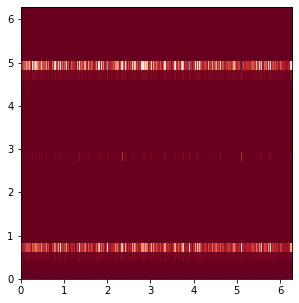

In [ ]:
adhoc_dimension = 2

#X_train, y_train, X_test, y_test, adhoc_total = ad_hoc_data(training_size=20 ,test_size=5 ,n=adhoc_dimension ,gap=0.3 ,plot_data=False ,one_hot=False ,include_sample_total=True,)

print(X_train[np.where(y_train[:] == 0), 0])
print(X_train[np.where(y_train[:] == 0), 1])
X_train, y_train, X_test, y_test, adhoc_total = train_features, test_features, train_labels, test_labels , cancer['data']


plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)


#plt.scatter(
#    X_train[np.where(y_train[:] == 0), 0],
#    X_train[np.where(y_train[:] == 0), 1],
#    marker="s",
#    facecolors="w",
#    edgecolors="b",
#    label="A train",
#)

plt.scatter(
    X_train[np.where(y_train[:] == 0), 0],
    X_train[np.where(y_train[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    X_train[np.where(y_train[:] == 1), 0],
    X_train[np.where(y_train[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    X_test[np.where(y_test[:] == 0), 0],
    X_test[np.where(y_test[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    X_test[np.where(y_test[:] == 1), 0],
    X_test[np.where(y_test[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")

plt.show()

In [ ]:
from qiskit import IBMQ

IBMQ.save_account("7f7810855b472240e1e33d3caab8a942c7c5d868f4a15e1330a69e3447ff60b1e17207ef3ba66f4f6a6cd10a302f12c411951b0773ced76f951cd21049b653ce")

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
##get the back end
for backend in provider.backends():
  try:
    qubit_count = len(backend.properties().qubits)
  except:
    qubit_count = "Simulated"
  print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits ")


ibmq_qasm_simulator has 1 queued and Simulated qubits 
ibmq_lima has 469 queued and 5 qubits 
ibmq_belem has 56 queued and 5 qubits 
ibmq_quito has 46 queued and 5 qubits 
simulator_statevector has 1 queued and Simulated qubits 
simulator_mps has 0 queued and Simulated qubits 
simulator_extended_stabilizer has 0 queued and Simulated qubits 
simulator_stabilizer has 0 queued and Simulated qubits 
ibmq_manila has 72 queued and 5 qubits 
ibm_nairobi has 414 queued and 7 qubits 
ibm_oslo has 83 queued and 7 qubits 


In [ ]:
provider = IBMQ.get_provider('ibm-q')